# Preprocessing Quality Control And R&D

In [18]:
import os
from satpy import Scene
from h5py import File
import numpy as np
from pyresample.geometry import create_area_def
import datetime
import cv2
import matplotlib.pyplot as plt

In [12]:
DATA_DIR = '../data'

In [13]:
orignal_radar_images = os.listdir(f"{DATA_DIR}/radar/")

In [14]:
test_original_radar_image = f"{DATA_DIR}/radar/{orignal_radar_images[0]}"

In [16]:
radarFile = File(test_original_radar_image)


In [25]:
copy_of_data = np.array(radarFile['reflectivity'])
copy_of_data[copy_of_data >= 255] = 0

In [31]:
np.max(radarFile['reflectivity'])

255

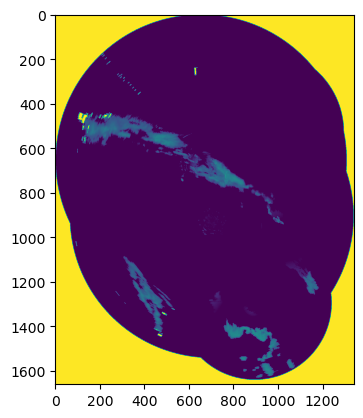

In [26]:
plt.imshow(radarFile['reflectivity'])

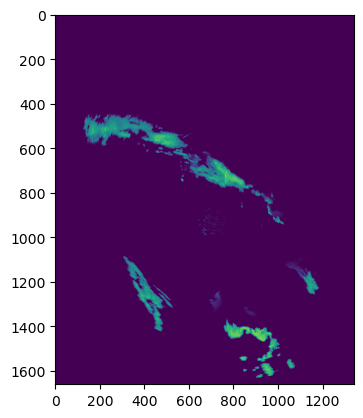

In [27]:
plt.imshow(copy_of_data)

In [ ]:
    # radar = np.array(radarFile[RADAR_PARAMETER])
    # radar = radar * rescale_ratio
    # resizeRadar = cv2.resize(radar, (134, 166))